<a href="https://colab.research.google.com/github/patbaa/demo_notebooks/blob/master/cnn_architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.utils import *
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import ResNet50

%matplotlib inline

# Implementing convolutional neural network architectures
### using tensorflow/keras
 - 1x1 convolution
 - skip-connection
 - batch normalization
 - global pooling

# 1. LeNet-5 (1998)

<img src="http://patbaa.web.elte.hu/lenet.png">

In [2]:
from tensorflow.keras import Sequential

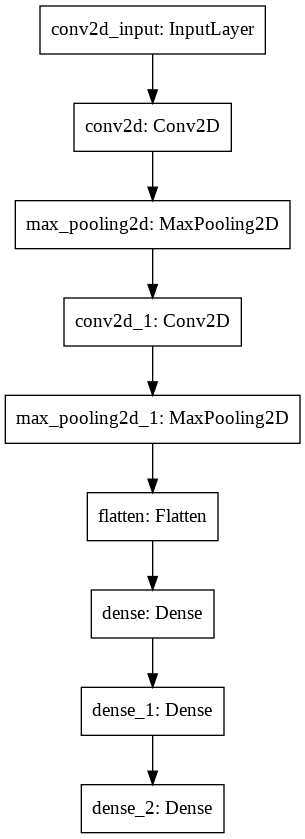

In [3]:
lenet = Sequential()
lenet.add(Conv2D(kernel_size=(5, 5), filters=6, activation='tanh', input_shape=(32, 32, 3)))
lenet.add(MaxPool2D())
lenet.add(Conv2D(kernel_size=(5, 5), filters=16, activation='tanh'))
lenet.add(MaxPool2D())
lenet.add(Flatten())
lenet.add(Dense(120, activation='tanh'))
lenet.add(Dense(84, activation='tanh'))
lenet.add(Dense(10, activation='softmax'))

lenet.compile(optimizer=SGD(lr=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(lenet)

In [4]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

# 2. VGG16 (2014)

- ImageNet 2014 2nd place, but the best single model

We can implement it the same way as LeNet-5, just need to add a bit more layers!
 - and use ReLU activation
 - use 3x3 convolutions
 - and possibly dropout / batchnorm for better performance

<img src="https://html.scirp.org/file/4-7800353x6.png">

Img source: https://file.scirp.org/Html/4-7800353_65406.htm

# 3. Multi-head convolutions - GoogLeNet (2014)
 - 2014 ImageNet winner
 - first author: Christian Szegedy
 - more complex than VGG
 
Building block: Inception module
 - 1x1 conv as bottlenect

<img src="http://patbaa.web.elte.hu/inception.png">

"However, in our setting, 1 × 1 convolutions have dual purpose: most critically, they
are used mainly as dimension reduction modules to remove computational bottlenecks, that would
otherwise limit the size of our networks. This allows for not just increasing the depth, but also the
width of our networks without significant performance penalty."

Source: https://arxiv.org/abs/1409.4842 

Many variants since then!

Let's implement **(a)**!

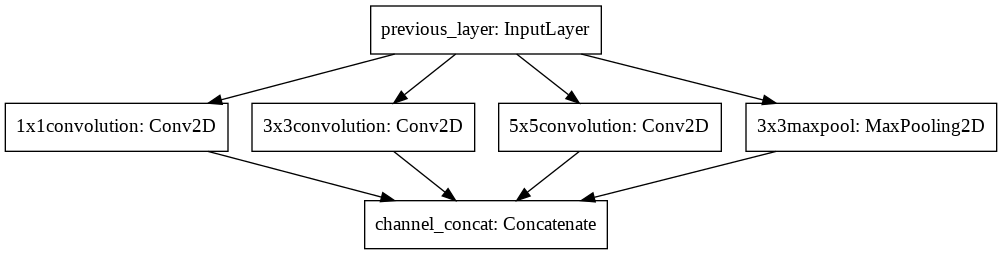

In [5]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')
c1 = Conv2D(3, (1, 1), padding='same', name='1x1convolution')(inputs)
c3 = Conv2D(16, (3, 3), padding='same', name='3x3convolution')(inputs)
c5 = Conv2D(16, (5, 5), padding='same', name='5x5convolution')(inputs)
mp = MaxPool2D((3, 3), strides=1, padding='same', name='3x3maxpool')(inputs)
outputs = Concatenate(axis=-1, name='channel_concat')([c1, c3, c5, mp])
inception_module = Model(inputs = inputs, outputs = outputs)

plot_model(inception_module)

In [6]:
inception_module.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
previous_layer (InputLayer)     [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
1x1convolution (Conv2D)         (None, 224, 224, 3)  12          previous_layer[0][0]             
__________________________________________________________________________________________________
3x3convolution (Conv2D)         (None, 224, 224, 16) 448         previous_layer[0][0]             
__________________________________________________________________________________________________
5x5convolution (Conv2D)         (None, 224, 224, 16) 1216        previous_layer[0][0]             
_______________________________________________________________________________________

Let's implement **(b)**!

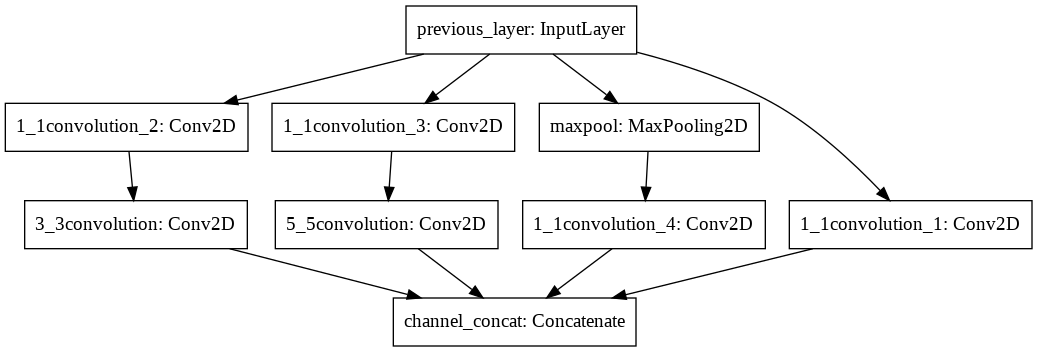

In [7]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')
c1 = Conv2D(3, (1, 1), padding='same', name='1_1convolution_1')(inputs)

c3 = Conv2D(3, (1, 1), padding='same', name='1_1convolution_2')(inputs)
c3 = Conv2D(16, (3, 3), padding='same', name='3_3convolution')(c3)

c5 = Conv2D(3, (1, 1), padding='same', name='1_1convolution_3')(inputs)
c5 = Conv2D(16, (5, 5), padding='same', name='5_5convolution')(c5)

mp = MaxPool2D((3, 3), strides=1, padding='same', name='maxpool')(inputs)
mp = Conv2D(3, (1, 1), padding='same', name='1_1convolution_4')(mp)

outputs = Concatenate(axis=-1, name='channel_concat')([c1, c3, c5, mp])
inception_module = Model(inputs = inputs, outputs = outputs)

plot_model(inception_module)

#### Bottlenek effect of 1x1 conv

In [8]:
m = Sequential()
m.add(Conv2D(512, (3, 3), input_shape=(200, 200, 512)))
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 512)     2359808   
Total params: 2,359,808
Trainable params: 2,359,808
Non-trainable params: 0
_________________________________________________________________


In [9]:
m = Sequential()
m.add(Conv2D(128, (1, 1), input_shape=(200, 200, 512)))
m.add(Conv2D(512, (3, 3)))

m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 128)     65664     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 198, 198, 512)     590336    
Total params: 656,000
Trainable params: 656,000
Non-trainable params: 0
_________________________________________________________________


# 4. skip-connections

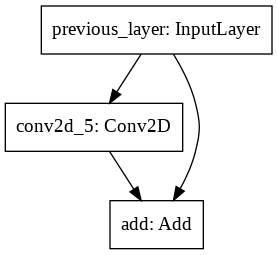

In [10]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')

a = Conv2D(3, (3, 3), padding='same')(inputs)

outputs = Add()([inputs, a])
skip = Model(inputs = inputs, outputs = outputs)

plot_model(skip)

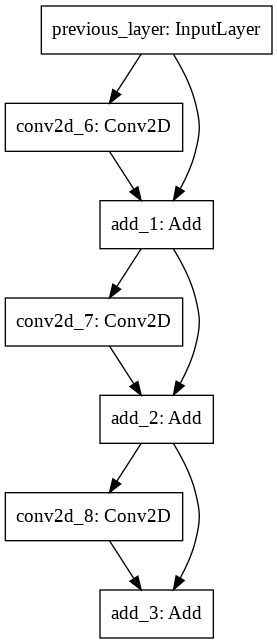

In [11]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')

a = Conv2D(3, (3, 3), padding='same')(inputs)
b = Add()([inputs, a])

c = Conv2D(3, (3, 3), padding='same')(b)
d = Add()([c, b])
          
e = Conv2D(3, (3, 3), padding='same')(d)
outputs = Add()([e, d])

skip = Model(inputs = inputs, outputs = outputs)

plot_model(skip)

# 5. ResNet

<img src="http://patbaa.web.elte.hu/resnet50.png">

Source: Ji et al: Optimized Deep Convolutional Neural Networks for Identification of Macular Diseases from Optical Coherence Tomography Images

102973440/102967424 [==============================] - 2s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.575546 to fit



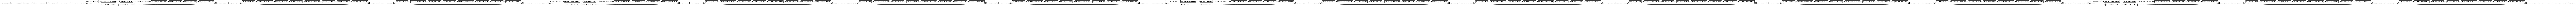

In [12]:
resnet50 = ResNet50()
plot_model(resnet50, rankdir='LR')

In [13]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

State-of-the art models often comes with implementations as well.

https://paperswithcode.com/ is like the Google for such models/papers. These models often propagate to the official Tenforflow/Keras or Pytorch packages as pre-trained models. But by now you can implement them too!

# Based on these ideas, can we improve our CIFAR-100 score? (~ 50%)

In [14]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

y_train_oh = to_categorical(y_train)
y_test_oh  = to_categorical(y_test)

std = x_train.std()
mean = x_train.mean()

x_train = (x_train - mean)/std
x_test  = (x_test - mean)/std

169009152/169001437 [==============================] - 3s 0us/step


In [15]:
# let's use the convolutional and identity blocks from resnet
def conv_block(X, n_channels):
    top = Conv2D(kernel_size = (1, 1), filters = n_channels, padding = 'same')(X)
    top = BatchNormalization()(top)
    top = Activation('relu')(top)
    
    top = Conv2D(kernel_size = (3, 3), filters = n_channels, padding = 'same')(top)
    top = BatchNormalization()(top)
    top = Activation('relu')(top)
    
    top = Conv2D(kernel_size = (1, 1), filters = n_channels, padding = 'same')(top)
    top = BatchNormalization()(top)
    
    bottom = Conv2D(kernel_size = (1, 1), filters = n_channels, padding = 'same')(X)
    bottom = BatchNormalization()(bottom)
    
    result = Add()([top, bottom])
    result = Activation('relu')(result)
    
    return result

    
def identity_block(X, n_channels):
    top = Conv2D(kernel_size = (1, 1), filters = n_channels, padding = 'same')(X)
    top = BatchNormalization()(top)
    top = Activation('relu')(top)
    
    top = Conv2D(kernel_size = (3, 3), filters = n_channels, padding = 'same')(top)
    top = BatchNormalization()(top)
    top = Activation('relu')(top)
    
    top = Conv2D(kernel_size = (1, 1), filters = n_channels, padding = 'same')(top)
    top = BatchNormalization()(top)
    
    result = Add()([top, X])
    
    return result

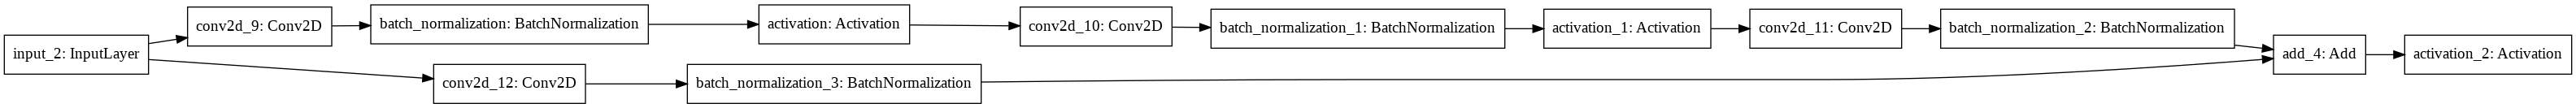

In [16]:
inputs = Input(shape = (32, 32, 3))
output = conv_block(inputs, 64)
model = Model(inputs = inputs, outputs = output, name = 'conv_block')
plot_model(model, rankdir='LR')

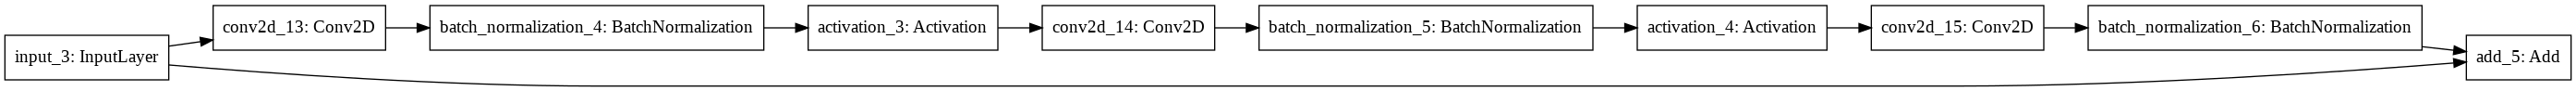

In [17]:
inputs = Input(shape = (32, 32, 64))
output = identity_block(inputs, 64)
model = Model(inputs = inputs, outputs = output, name = 'identity_block')
plot_model(model, rankdir='LR')

In [18]:
inputs = Input(shape = (32, 32, 3))
X = conv_block(inputs, 64)
X = identity_block(X, 64)
X = identity_block(X, 64)
X = identity_block(X, 64)
X = identity_block(X, 64)
X = identity_block(X, 64)
X = MaxPooling2D()(X)

X = conv_block(X, 128)
X = identity_block(X, 128)
X = identity_block(X, 128)
X = MaxPooling2D()(X)

X = conv_block(X, 256)
X = identity_block(X, 256)
X = identity_block(X, 256)

X = conv_block(X, 512)
X = identity_block(X, 512)
X = identity_block(X, 512)
X = GlobalMaxPooling2D()(X)

X = Dense(100)(X)
X = Activation('softmax')(X)

model = Model(inputs, X)

In [19]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 64)   256         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 32, 32, 64)   256         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_5 (Activation)       (None, 32, 32, 64)   0           batch_normalization_7[0][0]      
_______________________________________________________________________________________

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_oh, epochs=20, batch_size=32, validation_data=(x_test, y_test_oh))

Epoch 1/20
1563/1563 [==============================] - 117s 75ms/step - loss: 4.1382 - accuracy: 0.1123 - val_loss: 3.9330 - val_accuracy: 0.1797
Epoch 2/20
1563/1563 [==============================] - 117s 75ms/step - loss: 3.1583 - accuracy: 0.2532 - val_loss: 6.7684 - val_accuracy: 0.2821
Epoch 3/20
1563/1563 [==============================] - 117s 75ms/step - loss: 2.4503 - accuracy: 0.3818 - val_loss: 21.4877 - val_accuracy: 0.3353
Epoch 4/20
1563/1563 [==============================] - 117s 75ms/step - loss: 1.9972 - accuracy: 0.4803 - val_loss: 2.0121 - val_accuracy: 0.4711
Epoch 5/20
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6782 - accuracy: 0.5453 - val_loss: 1.7815 - val_accuracy: 0.5352
Epoch 6/20
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4201 - accuracy: 0.6043 - val_loss: 1.9467 - val_accuracy: 0.5624
Epoch 7/20
1563/1563 [==============================] - 117s 75ms/step - loss: 1.2023 - accuracy: 0.6580 - val_loss: 